# How Artificial Intelligence is Impacting the Job Market

## Setting Up The Data

In [72]:
import pandas as pd

In [74]:
df = pd.read_csv("datasets/ai_job_market_insights.csv")
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


## Pre-processing the data

In [76]:
df.shape # 500 rows and 10 cols

(500, 10)

In [78]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [80]:
df.dtypes # All of the data types match as expected

Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object

In [82]:
df.isnull().sum() # No Null Values found in our dataset

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [84]:
duplicates = df[df.duplicated()] # No duplicate entries in the dataset
duplicates

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection


In [86]:
# Dropping irrelevant columns
df.drop("Salary_USD", axis=1, inplace=False)
df.drop("Location", axis=1, inplace=True)
df.drop("Remote_Friendly", axis=1, inplace=True)

In [88]:
df

,Job_Title,Industry,Company_Size,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Medium,High,UX/UI Design,111392.165243,Growth
1,Marketing Specialist,Technology,Large,Medium,High,Marketing,93792.562466,Decline
2,AI Researcher,Technology,Large,Medium,High,UX/UI Design,107170.263069,Growth
3,Sales Manager,Retail,Small,Low,High,Project Management,93027.953758,Growth
4,Cybersecurity Analyst,Entertainment,Small,Low,Low,JavaScript,87752.922171,Decline
...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Low,Medium,Machine Learning,105821.394046,Stable
496,Cybersecurity Analyst,Telecommunications,Small,Low,High,UX/UI Design,119794.992146,Decline
497,Cybersecurity Analyst,Energy,Large,High,Low,UX/UI Design,79644.933099,Stable
498,Operations Manager,Healthcare,Large,High,Low,Python,77642.150625,Stable


## Visualizations

### What types of industries and jobs are affected by AI the most?

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

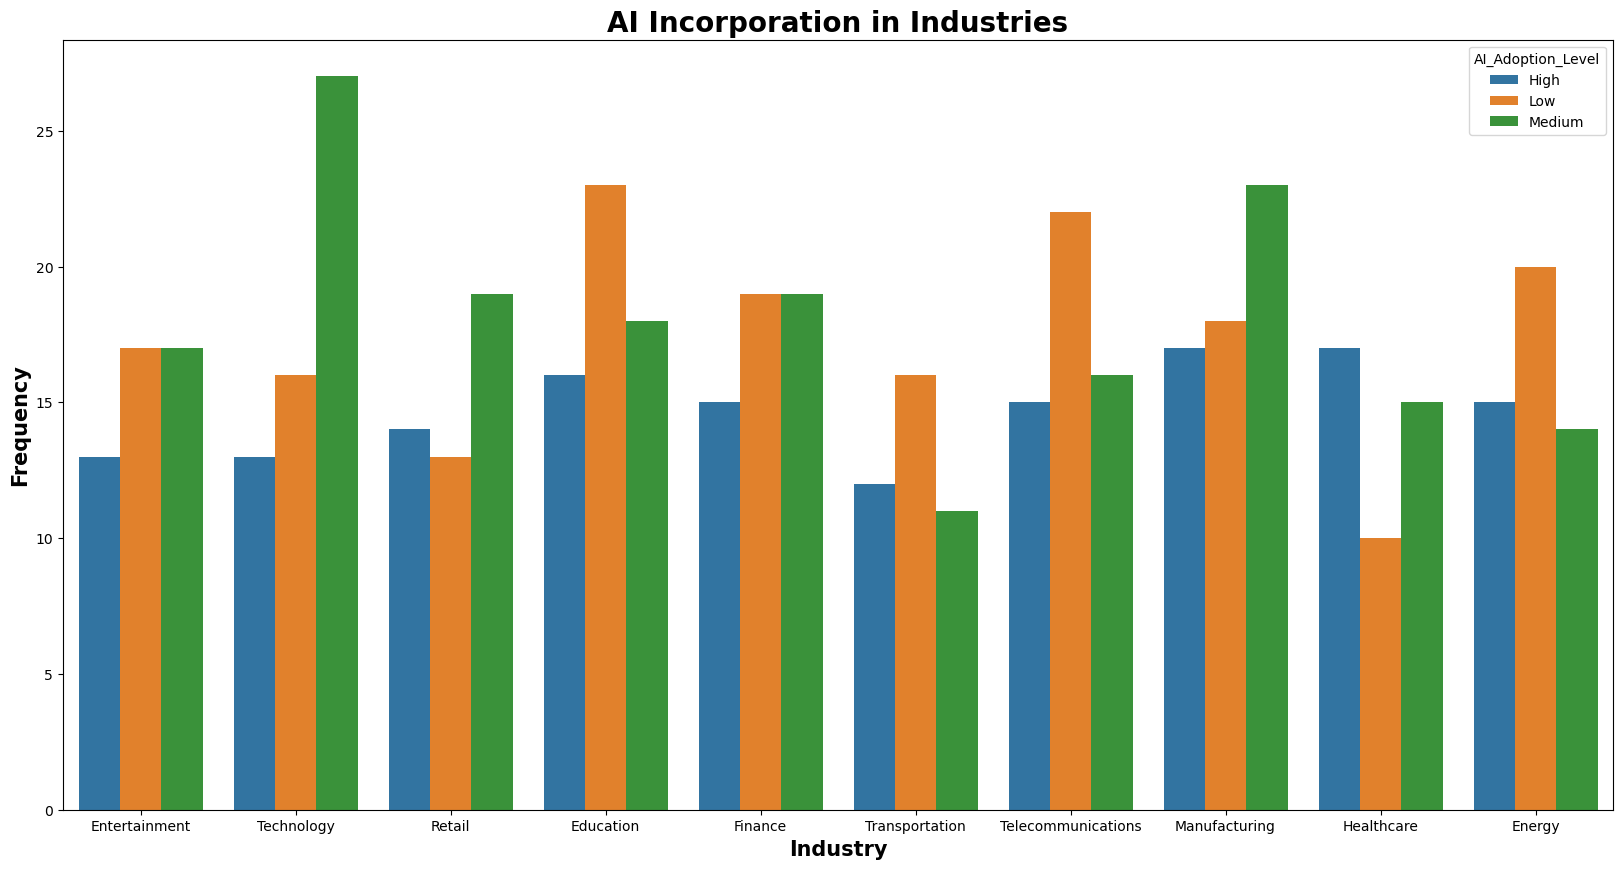

In [104]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Industry", hue="AI_Adoption_Level", data=df, orient="v", hue_order=["High", "Low", "Medium" ])
plt.title(label="AI Incorporation in Industries", fontsize="20", fontweight="bold")
plt.xlabel('Industry', fontsize="15", fontweight="bold")
plt.ylabel('Frequency', fontsize="15", fontweight="bold")
plt.show()


### What required skills can AI replace?

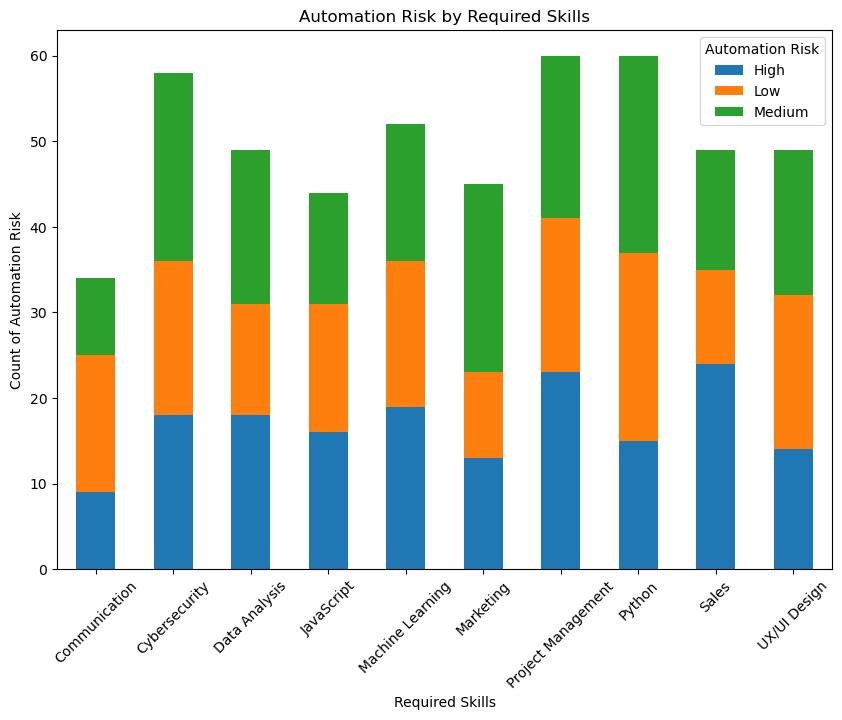

In [96]:
skill_risk_counts = pd.crosstab(df['Required_Skills'], df['Automation_Risk'])

# Plot the stacked bar chart
skill_risk_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Required Skills')
plt.ylabel('Count of Automation Risk')
plt.title('Automation Risk by Required Skills')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk')


plt.show()

### Is there a relationship between the size of the company and how willing they are to incorporate AI into the workspace?

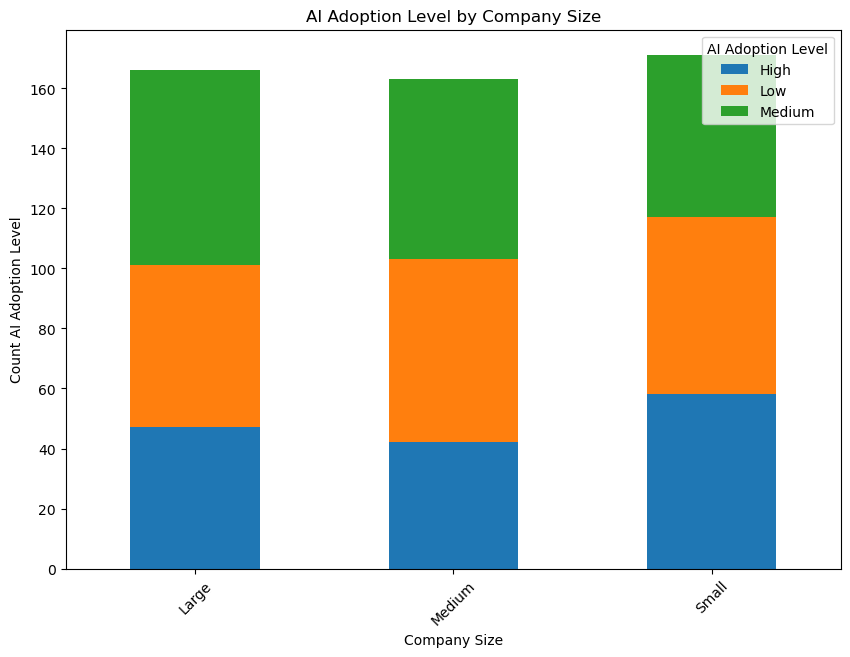

In [98]:
# Create a crosstab 
ai_adoption_counts = pd.crosstab(df['Company_Size'], df['AI_Adoption_Level'])

# Plot a stacked bar chart 
ai_adoption_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

# labels and title
plt.xlabel('Company Size')
plt.ylabel('Count AI Adoption Level')
plt.title('AI Adoption Level by Company Size')
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level')

plt.show()